In [2]:
import matplotlib.pyplot as plt
import skimage
import cv2
import pandas as pd 
import seaborn as sns

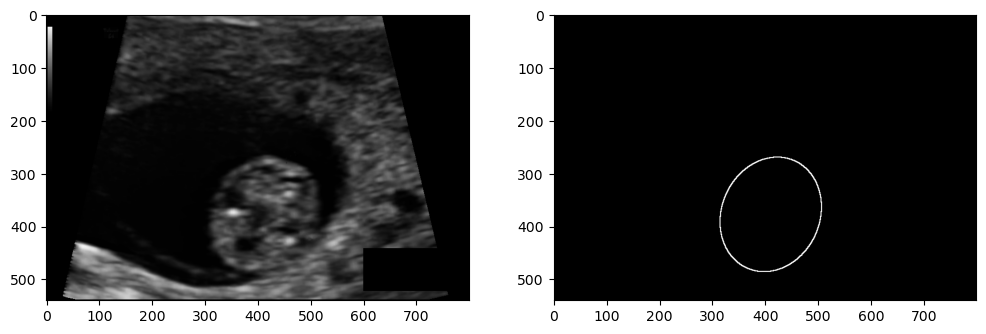

In [3]:
img = cv2.imread("../data/hc18/training_set/000_HC.png")
gt = cv2.imread("../data/hc18/training_set/000_HC_Annotation.png")

fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(img[:,:,::-1])
ax[1].imshow(gt[:,:,::-1])

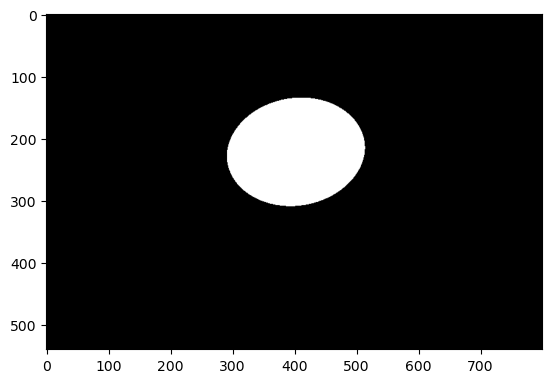

In [95]:
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

gt = cv2.imread("../data/hc18/training_set/001_HC_Annotation.png")
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
threshold = threshold_otsu(gt)
binary = gt <= threshold

# Detect blob
label_image, num_label = label(binary, return_num=True)
regions = regionprops(label_image)

plt.imshow((label_image==2).astype(int), 'gray')

((402.6225891113281, 221.64920043945312), (173.4528045654297, 223.54515075683594), 81.00831604003906)


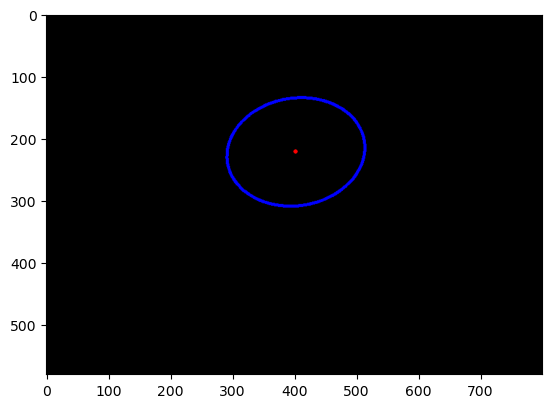

In [96]:
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

import cv2
import numpy as np 

image = np.full((580, 800,3), 0, dtype=np.uint8)

mask = ((label_image == 2).astype(np.uint8))

edges = canny(mask, low_threshold=0, high_threshold=1).astype(np.uint8)

contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ellipse = cv2.fitEllipse(contours[0])
print(ellipse)

cv2.circle(image, (int(ellipse[0][0]), int(ellipse[0][1])), radius=2, color=(255,0,0), thickness=2)
cv2.ellipse(image, ellipse, (0,0,255),3)

plt.imshow(image)


In [ ]:
print("Image Shape: ", img.shape)
print("GT shape: ", gt.shape)

Image Shape:  (540, 800, 3)
GT shape:  (540, 800)


In [ ]:
df_label = pd.read_csv("../data/hc18/training_set_pixel_size_and_HC.csv")
df_label.head(3)

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75


In [ ]:
df_label.describe()

,pixel size(mm),head circumference (mm)
count,999.000000,999.000000
mean,0.139846,174.383093
std,0.053005,65.282061
min,0.049415,44.300000
25%,0.108801,153.600000
50%,0.128357,174.060000
75%,0.157678,189.825000
max,0.393280,346.400000


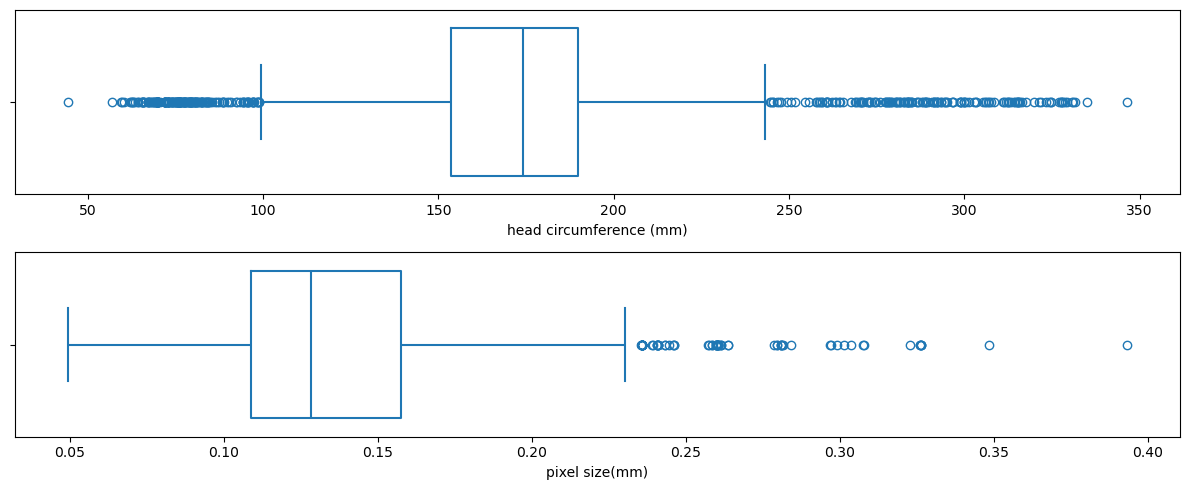

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (12,5))
sns.boxplot(data = df_label, x = "pixel size(mm)", ax=ax[1], fill=False)
sns.boxplot(data = df_label, x = "head circumference (mm)", ax=ax[0], fill=False)
plt.tight_layout()

<Axes: xlabel='pixel size(mm)', ylabel='Count'>

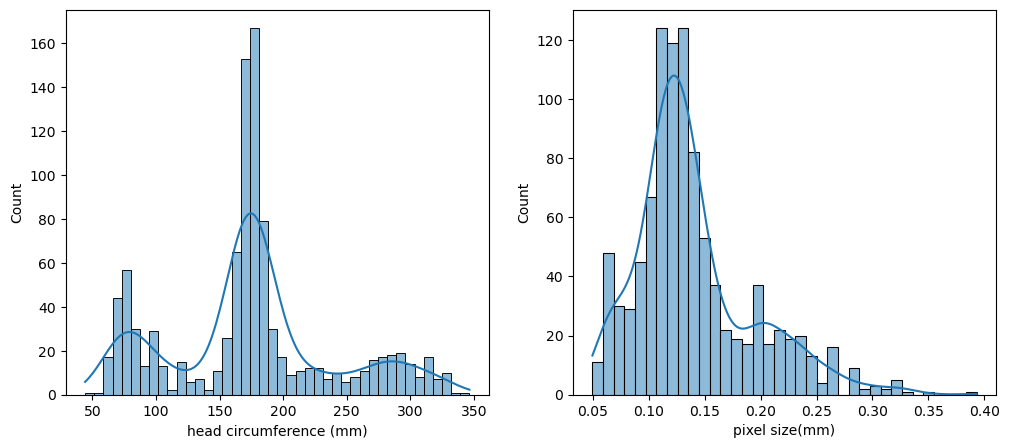

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

sns.histplot(data = df_label, x = "head circumference (mm)", ax=ax[0], kde=True)
sns.histplot(data = df_label, x = "pixel size(mm)", ax=ax[1], kde=True)

<Axes: >

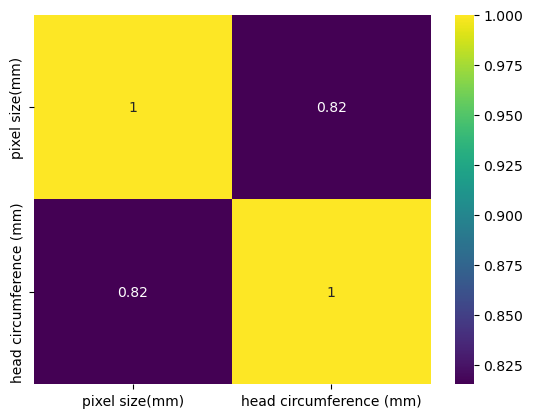

In [ ]:
label_correlation = df_label.iloc[:, 1:].corr()
sns.heatmap(label_correlation, annot=True, cmap="viridis")

<Axes: xlabel='head circumference (mm)', ylabel='pixel size(mm)'>

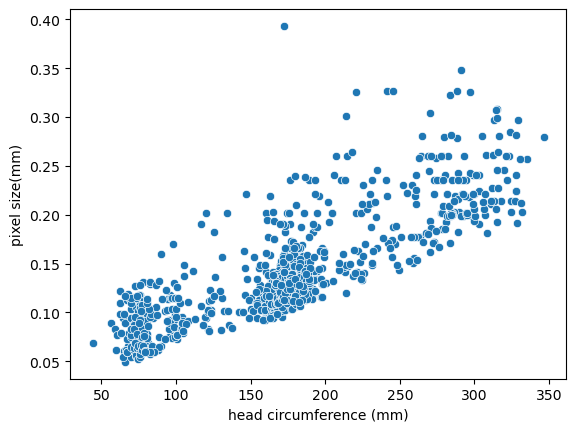

In [ ]:
sns.scatterplot(data = df_label, x = "head circumference (mm)", y = "pixel size(mm)")